<a href="https://colab.research.google.com/github/marcos-code/sigmoidal_datascience/blob/main/Analise_Violencia_Rio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise da Violência do Rio de Janeiro


<center><img src="https://image.freepik.com/vetores-gratis/conceito-de-carnaval-brasileiro-com-pessoas-a-dancar-e-natureza_1284-27444.jpg" >

Não temos dúvidas que o Rio de Janeiro é uma cidade maravilhosa, mas em questão de criminalidade assim como todo o Brasil sofre, o Rio é a pauta dos noticiários que assistimos diariamente. 

# Obtenção dos dados

Os dados foram disponibilizados pelo portal [ISPDADOS](https://http://www.ispdados.rj.gov.br/estatistica.html) no qual é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

A criação do portal ISPDados e a consequente consolidação dos dados históricos de criminalidade e atividade policial do estado exigiu um processo de revisão dos dados divulgados, com vistas à equalização de códigos de ocorrência contabilizados e agregados em cada título divulgado ao longo do tempo.

Sendo assim, o presente processo de revisão de dados é mais uma etapa do compromisso do ISP com a transparência e a qualidade dos dados oficiais da Segurança Pública do Estado do Rio de Janeiro. O dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente [neste link](http://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv)

#Dicionário de Variáveis

O dicionário de variáveis foi organizado em ordem alfabética para facilitar a consulta das variáveis

* aaapai - Auto de Apreensão de Adolescente por Prática de Ato Infracional

* ameaca - Ameaça

* apf - Auto de Prisão em Flagrante

* apreensao_drogas - Apreensão de drogas

* apreensao_drogas_sem_autor - Número de registros que possuem algum título referente a apreensão de drogas sem autor

* cmba - Cumprimento de Mandado de Busca e Apreensão

* cmp - Cumprimento de Mandado de Prisão

* encontro_cadaver - Encontro de cadáver

* encontro_ossada - Encontro de ossada

* estelionato - Estelionato

* estupro - Estupro

* extorsao - Extorsão

* fase - 2 - Consolidado sem errata 3 - Consolidado com errata

* furto_bicicleta - Furto de Bicicleta

* furto_celular - Furto de Celular

* furto_coletivo - Furto em coletivo

* furto_transeunte Furto em transeunte

* furto_veiculos - Furto de Veículo

* hom_culposo - Homicídio culposo (trânsito)

* hom_doloso - Homicídio doloso

* hom_por_interv_policial - Morte por intervenção de agente do Estado

* indicador_letalidade - Indicador de letalidade*

* indicador_roubo_rua - Indicador de roubo de rua*

* indicador_roubo_veic - Indicador roubo de veículo*

* latrocinio - Latrocínio (roubo seguido de morte)

* lesao_corp_culposa - Lesão corporal culposa (trânsito)

* lesao_corp_dolosa - Lesão corporal dolosa

* lesao_corp_morte - Lesão corporal seguida de morte

* mes - Mês da comunicação da ocorrência

* outros_furtos - Outros furtos que não os listados acima

* outros_roubos - Outros roubos que não os listados acima

* pessoas_desaparecidas - Pessoas desaparecidas

* pol_civis_mortos_serv - Policiais Civis mortos em serviço

* pol_militares_mortos_serv - Policiais Militares mortos em serviço

* posse_drogas - Número de registros que possuem algum título referente a posse de drogas

* recuperacao_veiculos - Recuperação de veículo

* registro_ocorrencias - Registro de ocorrências

* roubo_apos_saque - Roubo após saque em instituição financeira

* roubo_banco - Roubo à banco

* roubo_bicicleta Roubo de bicicleta

* roubo_carga - Roubo de carga

* roubo_celular - Roubo de celular

* roubo_comercio - Roubo a estabelecimento comercial

* roubo_conducao_saque - Roubo com condução da vítima para saque em instituição financeira

* roubo_cx_eletronico - Roubo de caixa eletrônico

* roubo_em_coletivo - Roubo em coletivo

* roubo_residencia - Roubo à residência

* roubo_transeunte - Roubo à transeunte

* roubo_veiculo - Roubo à veículo

* sequestro - Extorsão mediante sequestro (sequestro clássico)

* sequestro_relampago - Extorsão com momentânea privação da liberdade (sequestro relâmpago)

* tentat_hom - Tentativa de homicídio

* total_furtos - Total de furtos

* total_roubos - Total de roubos

* trafico_drogas - Número de registros que possuem algum título referente a tráfico de drogas

* vano - Ano da comunicação da ocorrência

# Importando os dados e pacotes necessários

In [2]:
# importando os dados e bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# definindo o caminho do arquivo
file_path = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv"

df = pd.read_csv(file_path)
# criando uma cópia do dataframe
df_rj = df.copy()
# dataframe que irá ser analisado
df_rj.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Ao fazer uma cópia do dataset original, iremos começar nossas analises entendendo quantas entradas e variáveis possui.

In [4]:
print('O nosso dataset possui {} entradas e {} variáveis'.format(df_rj.shape[0],df_rj.shape[1]))

O nosso dataset possui 344 entradas e 56 variáveis


Após ver a quantidade de entradas e variáveis que o nosso dataset possue, vamos entender um pouco melhor de como estão estruturadas nossas variáveis.

In [5]:
# Agora iremos ver quais os tipos de dados e valores ausentes no Dataset
df_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Podems perceber que todas as variáveis são to tipo numérico `int` e `float`

Vamos ver até que ano as datas estão indo em nosso dataset

In [6]:
# Temos a variável 'vano' em nosso dataset, vamos ver até que ano estão em nossos dados
anos_rj = df_rj.vano.unique()
print("Todos os anos presentes:", anos_rj)
print("Os anos vão de {} à {}".format(anos_rj[0],anos_rj[-1]))


Todos os anos presentes: [1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]
Os anos vão de 1991 à 2019


In [ ]:
# ou podemos usar o tail() para saber a ultima entrada
df_rj.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


# Porcentagem de valores ausentes

In [7]:
# Ver porcentagem de valores ausentes 
(df_rj.isnull().sum() / df_rj.shape[0]).sort_values(ascending=False)*100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Ao analisar nossas variáveis vimos que algumas possuem uma porcentagem significativa de valores faltantes como roubos de bicicletas e furto de bicicleta tem 80% dos dados faltantes. Isso pode ser um ídice que a maioria das pessoas podem não fazer a ocorrência. 

# Informações Estatísticas sobre a violência do Rio de Janeiro

Utilizaremos o método describe() para visualizar a distribuição estatística do dataframe.

Esse método nos ajuda na identificação de:
* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.







In [8]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

# Roubos de veículos

Sabemos que esse tipo de crime vem afetando grande parte da população brasileira, através dos dados em nosso dataframe sobre roubo, furto e recuperação de veículos, vamos analisar ese conjunto de dados.

In [46]:
max_roub_veic = df.roubo_veiculo.max()
min_roub_veic = df.roubo_veiculo.min()

# ver os qual os anos que tiveram maxima e min
print('Max:\t{}'.format(max_roub_veic))
print('Min:\t{}'.format(min_roub_veic))


Max:	5358
Min:	1097


In [49]:
df[df.roubo_veiculo == 5358]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
326,2018,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3


Em 2018 o indice de roubo de veiculos foi o maior tendo 5358 roubos de veículos.

In [50]:
df[df.roubo_veiculo == 1097]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3


Em 1991 teve o menor numero de roubos de veículos, comparado a 2018 foi de 1097

In [12]:
# ver a média variável de roubo de veículos, furto de veículos e recuperação de veículos
print('Média de roubo de veículos é:' ,round(df.roubo_veiculo.mean(),2))
print('Média de furto de veículos é:' ,round(df.furto_veiculos.mean(),2))
print('Média de recuperação de veículos é:' ,round(df.recuperacao_veiculos.mean(),2))

Média de roubo de veículos é: 2448.7
Média de furto de veículos é: 1674.67
Média de recuperação de veículos é: 1772.24


In [18]:
# Calcular a % de carros recuperados
car_rec = df.recuperacao_veiculos.sum() / ((df.roubo_veiculo.sum()) + (df.furto_veiculos.sum()))
print('Recuperação de carros roubado e furtados é {:.2%}.'.format(car_rec))

Recuperação de carros roubado e furtados é 42.98%.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


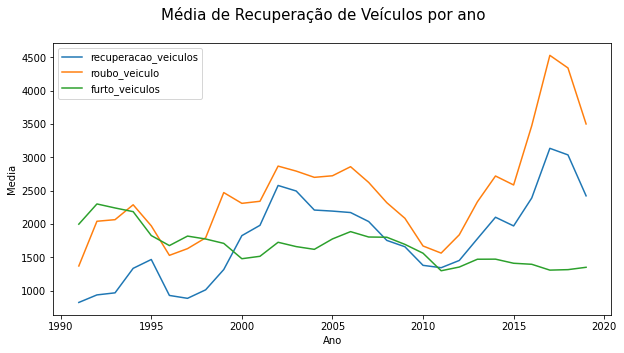

In [28]:
car_rec = df_rj.groupby(['vano'])['recuperacao_veiculos',
                                    'roubo_veiculo',
                                    'furto_veiculos'].mean()
# Plotando o Grafico
car_rec.plot(figsize=(10,5))
plt.xlabel('Ano', fontsize=10)
plt.ylabel('Media', fontsize=10)
plt.suptitle('Média de Recuperação de Veículos por ano', fontsize=15);

Através do grafico vemos que o roubo de veículos em meados de 2016/2017 teve uma alta considerável, o gráfico de recuperação de veículos tenta seguir a mesma linha, podemos entender que quando o veículo é furtado aumenta as chances do carro não ser levado, mas se levado eles podem ser recuperados.

# Análise de Homicido doloso


In [31]:
# ver valores max e min de homicido doloso
print('A quantidade máxima de homicidio doloso é:', (df.hom_doloso.min()), 'homicidios')
print('A quantidade máxima de homicidio doloso é:', (df.hom_doloso.max()), 'homicidios')

A quantidade máxima de homicidio doloso é: 272 homicidios
A quantidade máxima de homicidio doloso é: 831 homicidios


Acima podemos observar que a quantidade mínima de homicio doloso foi de 272 no mês e a máxima foi de 831, a baixo vamos ver qual mês teve esses indices.

In [34]:
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [36]:
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


#Visualização de dados


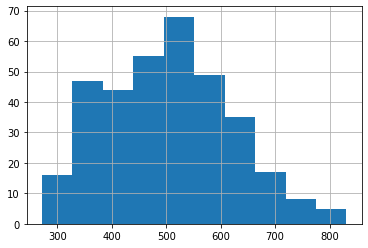

In [57]:
df.hom_doloso.hist();

Através do histograma os números de casos de homicidio doloso ficam entre:
* 500 a 550 em 70 meses
* Durante alguns meses houve um aumento para 800 casos de homicidios.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


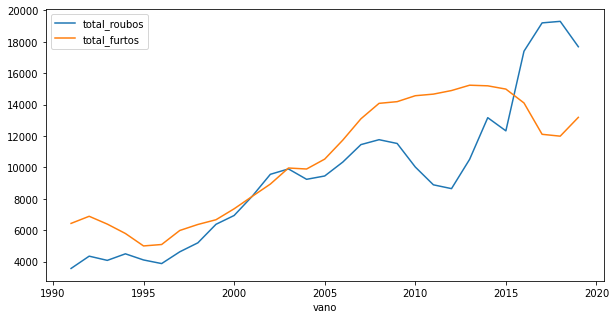

In [103]:
roubos = df_rj.groupby(['vano'])['total_roubos', 'total_furtos'].mean().plot(figsize=(10,5));

#Conclusão

Através dos dados disponibilizados pelo portal ISPDADOS do Rio de Janeiro, conseguimos tirar insgths interessantes desse dataset, com toda certeza com essas analises, pode ajudar tomadores de decisão a conseguir ver o melhorias que precisam ser feita os pontos fracos que precisam de mais atenção,por exemplo em questão de segurança pública o Rio precisa rever o que pode ser feito para que esses números de roubos e furtos caiam e passar mais segurança para a população.